In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns
sns.set()

In [ ]:
import pandas as pd  # Import the pandas library and give it the alias 'pd'

df = pd.read_csv('/content/Olympics 2024 (1).csv')
df.head()

,Competitions,Rank,NOC,Gold,Silver,Bronze,Total
0,Archery,1,South Korea,5,1,1,7
1,Archery,2,France*,0,1,1,2
2,Archery,3,United States,0,1,1,2
3,Archery,4,China,0,1,0,1
4,Archery,5,Germany,0,1,0,1


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 82.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
from sklearn.datasets import make_blobs

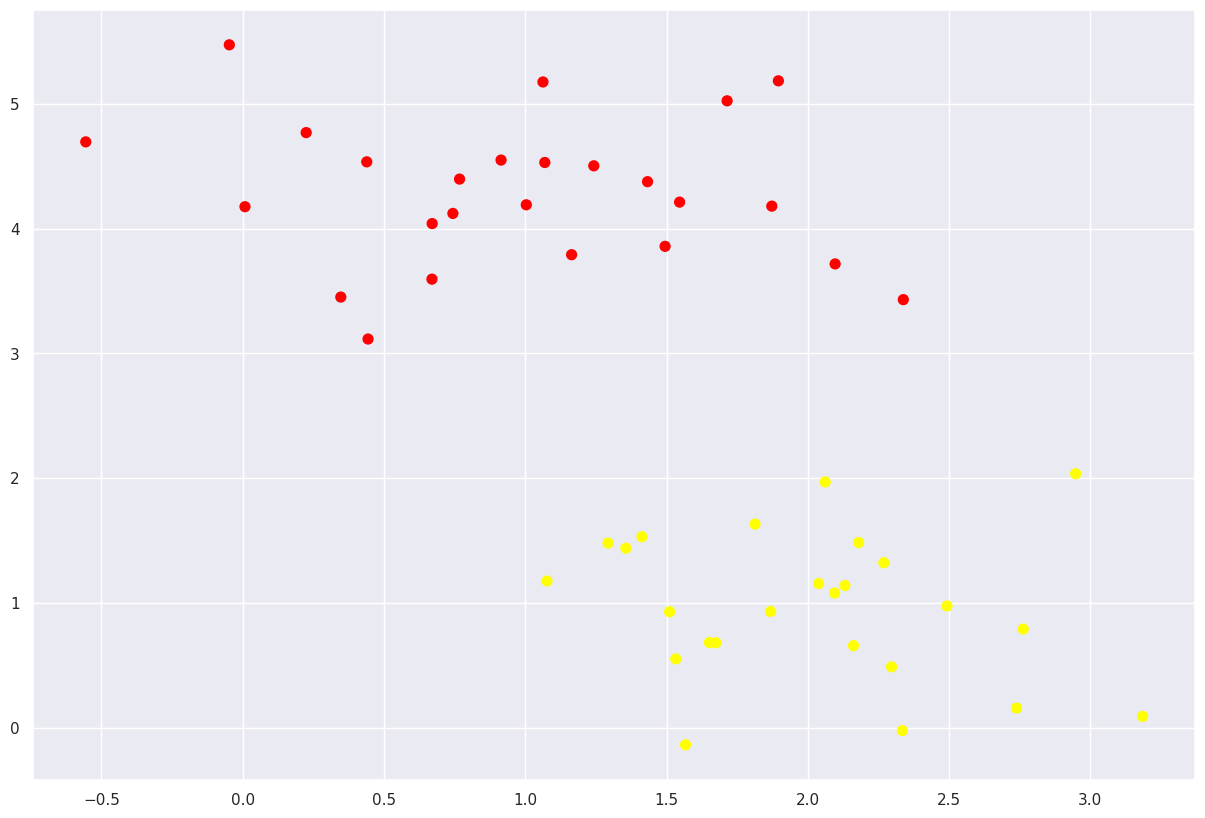

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

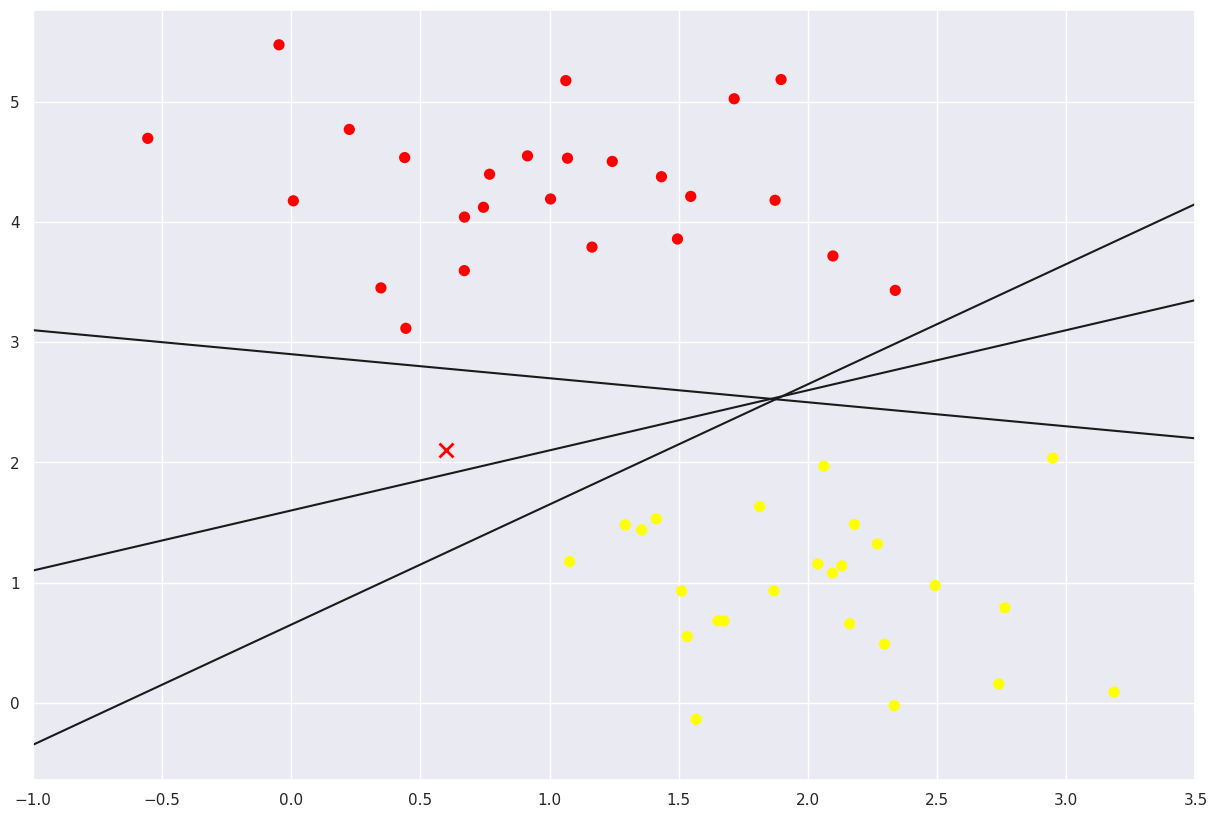

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

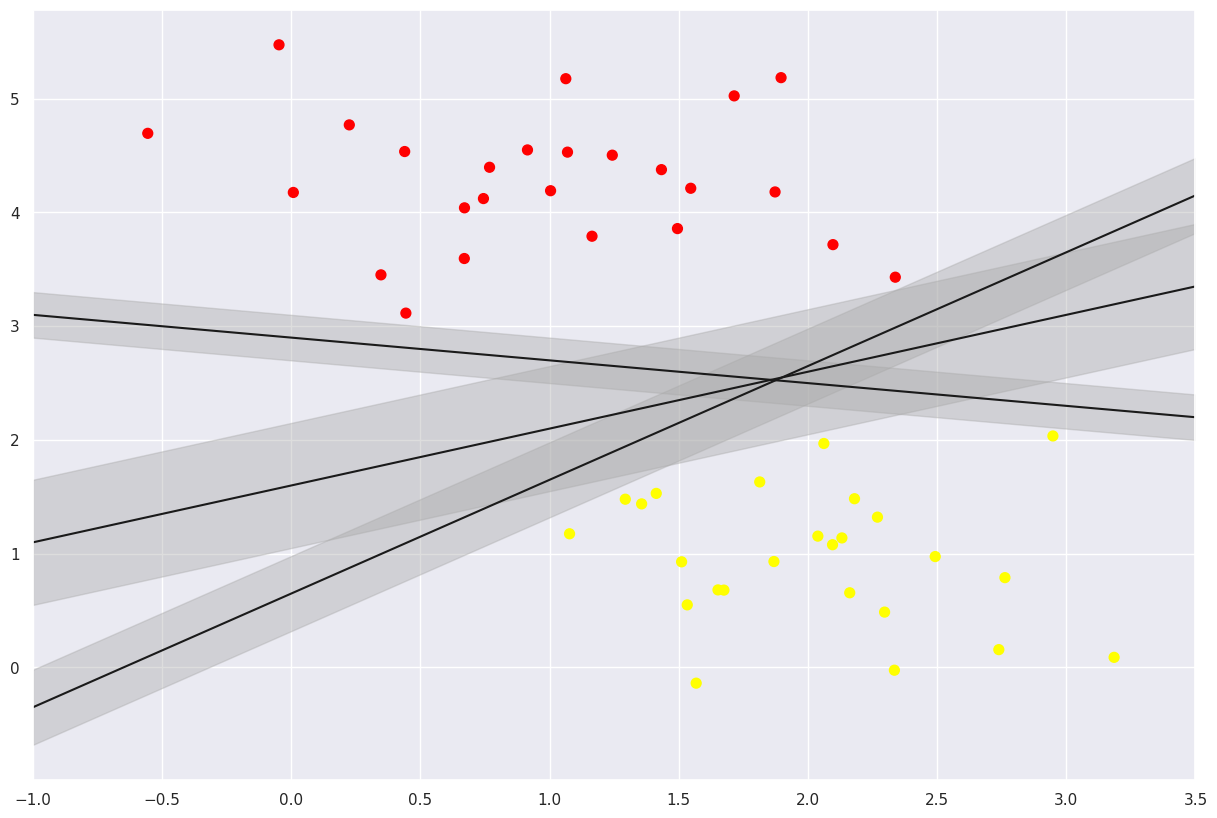

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
from sklearn.svm import SVC #Support vector classifier
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300,marker='o', linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

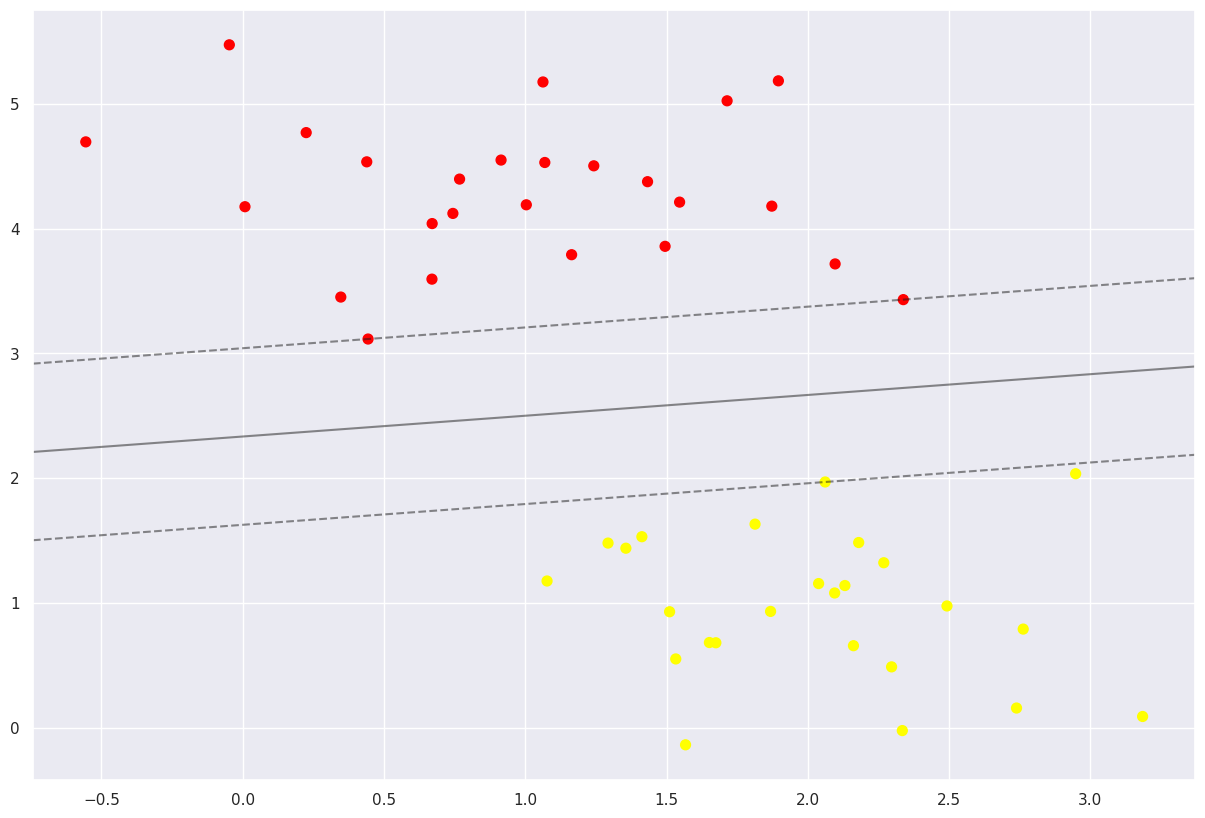

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

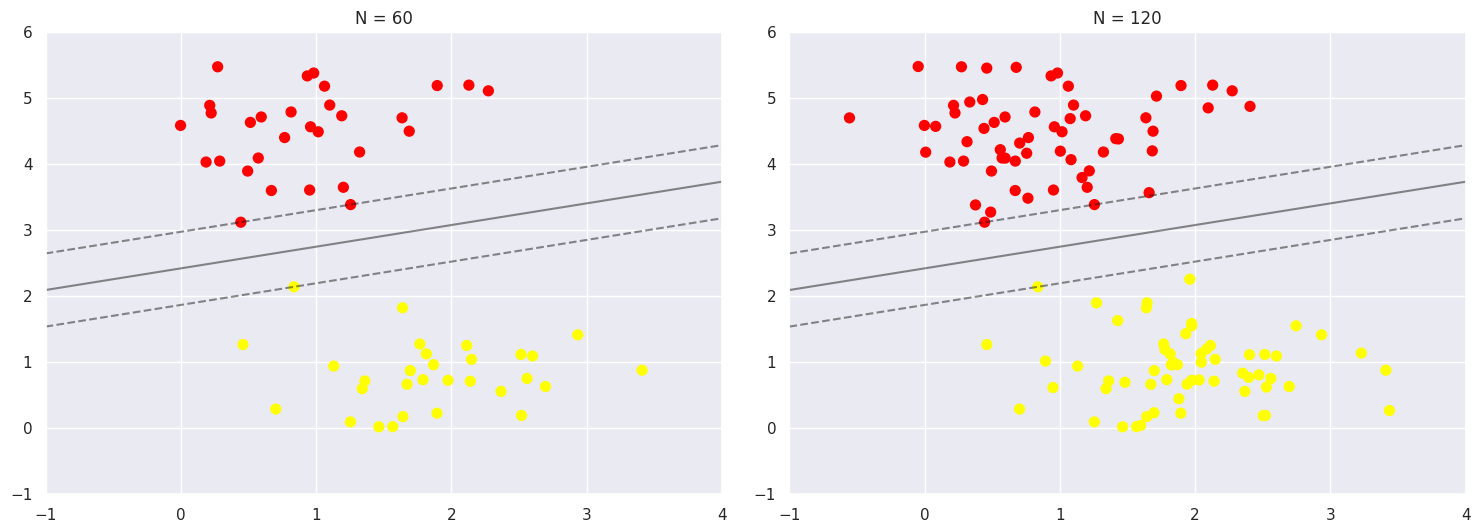

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50,marker='o', cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

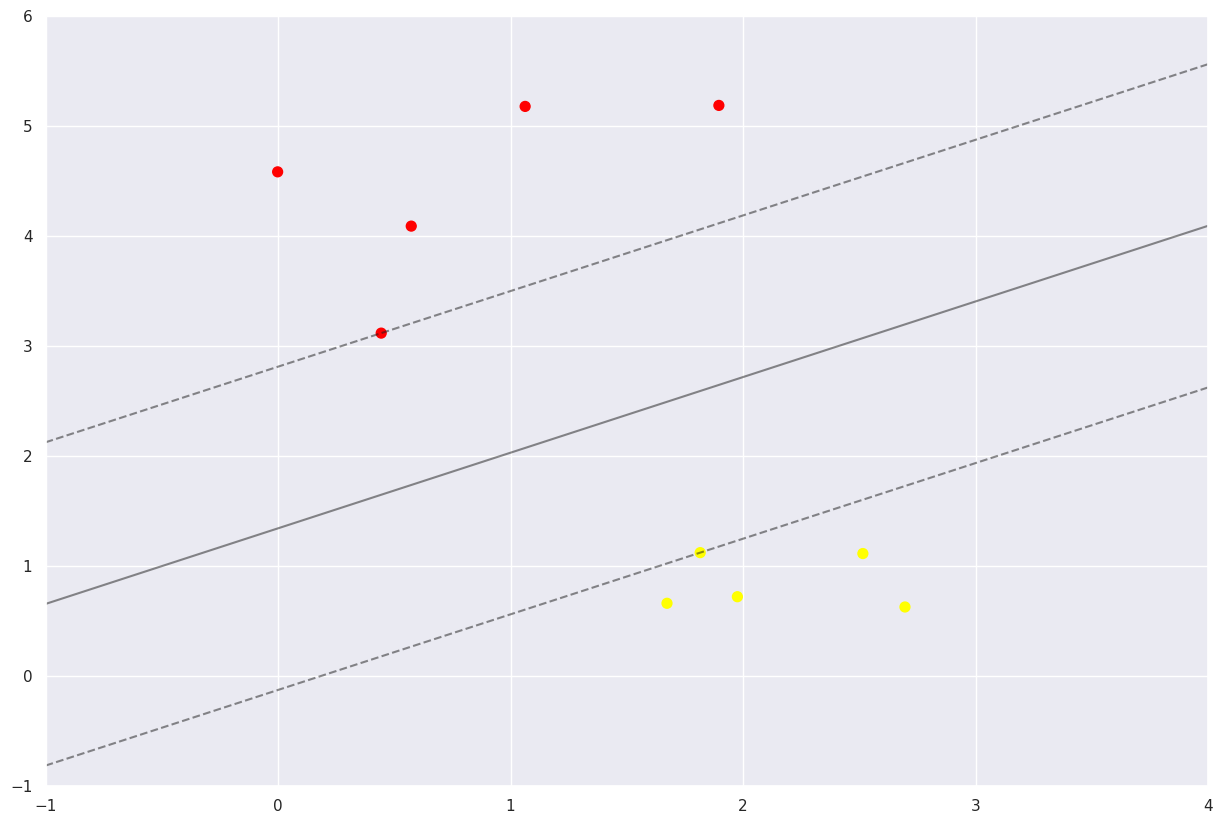

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

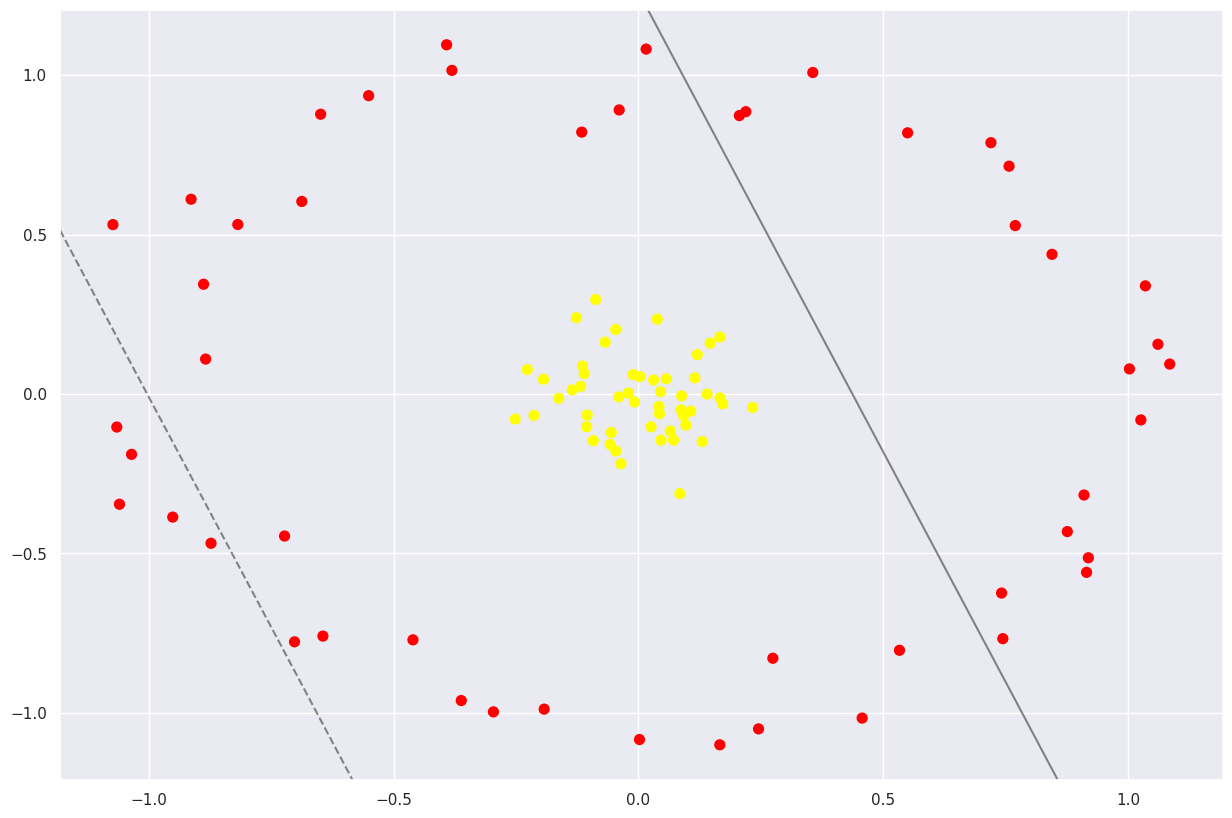

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

In [ ]:
X

array([[ 3.85084569e-02,  2.34810216e-01],
       [ 5.49672883e-01,  8.19253869e-01],
       [-4.60593725e-01, -7.70881507e-01],
       [-9.22661027e-02, -1.46007297e-01],
       [ 1.66122421e-01, -1.10006421e+00],
       [-2.96194120e-01, -9.96749154e-01],
       [ 1.56634505e-02,  1.08190567e+00],
       [ 7.19777726e-01,  7.88377462e-01],
       [-8.18316217e-01,  5.31767663e-01],
       [-7.22829074e-01, -4.45282593e-01],
       [ 1.08499264e+00,  9.39048954e-02],
       [-7.02427281e-01, -7.77083294e-01],
       [ 1.46355678e-01,  1.59373220e-01],
       [-5.51062624e-01,  9.35732533e-01],
       [-8.22100647e-03, -2.49700110e-02],
       [ 1.06535361e-01, -5.35656819e-02],
       [-2.07240257e-02,  3.25638066e-03],
       [ 2.33155324e-01, -4.20063351e-02],
       [-3.93941644e-02,  8.91003807e-01],
       [-3.61926003e-01, -9.61255880e-01],
       [-5.57190398e-02, -1.20670703e-01],
       [ 7.69510002e-01,  5.28384991e-01],
       [ 8.80179266e-02, -5.50489600e-03],
       [ 1.

In [ ]:
1.06909564e-01**2 +  1.09777740e+00**2

1.2165448748254302

In [ ]:
(X ** 2).sum(1)

array([ 4.33797319,  5.94886677, 21.20949269, 20.9852596 ,  5.55432806,
        7.52619292, 10.15315356,  8.12775403,  5.48815023, 29.96969663,
       28.19210807, 22.80602793, 21.67037615,  2.6523322 , 17.12275316,
       15.72933601, 17.54757708,  5.51165704,  9.90193269, 21.5398479 ,
        3.26695968,  6.89540399,  3.1455109 ,  3.19344527,  7.16439141,
       17.23973179, 16.77876006, 22.36063279,  5.10416435, 18.21580659,
        6.95462245, 20.76736266, 21.82996823, 17.44023459, 30.48297942,
        4.3581162 ,  5.83992485, 27.9239374 ,  5.45124056, 13.37557343,
        2.54165661, 20.14025674,  2.47575253,  3.90752063, 18.57594384,
        3.86012176, 12.83402182, 12.03526645,  8.25524101, 19.92794805])

In [ ]:
r = np.exp(-(X ** 2).sum(1))

In [ ]:
np.exp(-1.216)

0.2964134525853191

In [ ]:
r

array([1.30629776e-02, 2.60879522e-03, 6.14942288e-10, 7.69515820e-10,
       3.87066847e-03, 5.38785557e-04, 3.89530468e-05, 2.95230537e-04,
       4.13548681e-03, 9.64553069e-14, 5.70588521e-13, 1.24585619e-10,
       3.87860198e-10, 7.04866322e-02, 3.66170024e-08, 1.47514994e-07,
       2.39433054e-08, 4.03940838e-03, 5.00778035e-05, 4.41939596e-10,
       3.81221546e-02, 1.01242788e-03, 4.30449266e-02, 4.10302667e-02,
       7.73649669e-04, 3.25746392e-08, 5.16508047e-08, 1.94491473e-10,
       6.07141040e-03, 1.22737060e-08, 9.54214133e-04, 9.56861306e-10,
       3.30647510e-10, 2.66564525e-08, 5.77311547e-14, 1.28024822e-02,
       2.90906123e-03, 7.46084595e-13, 4.29097816e-03, 1.55260960e-06,
       7.87358570e-02, 1.79142089e-09, 8.40996791e-02, 2.00902506e-02,
       8.56189885e-09, 2.10654344e-02, 2.66842588e-06, 5.93130409e-06,
       2.59892881e-04, 2.21514484e-09])

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual

Text(0.5, 0, 'r')

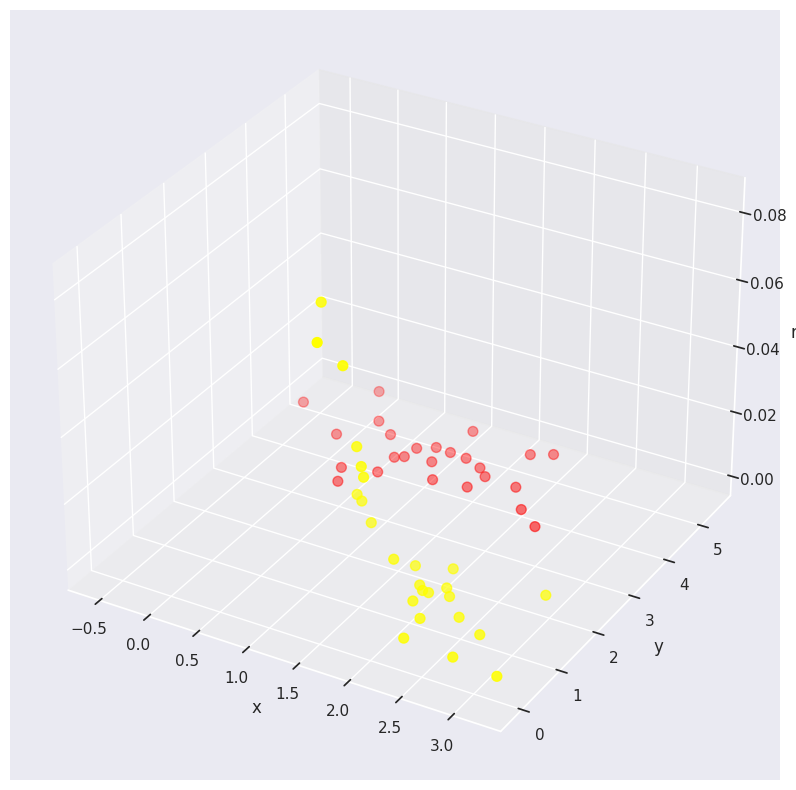

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [ ]:
clf.support_vectors_

array([[-0.04749204,  5.47425256],
       [ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 3.18515794,  0.08900822],
       [ 2.06156753,  1.96918596],
       [ 1.07714851,  1.17533301],
       [ 1.56737975, -0.1381059 ],
       [ 2.94821884,  2.03519717]])

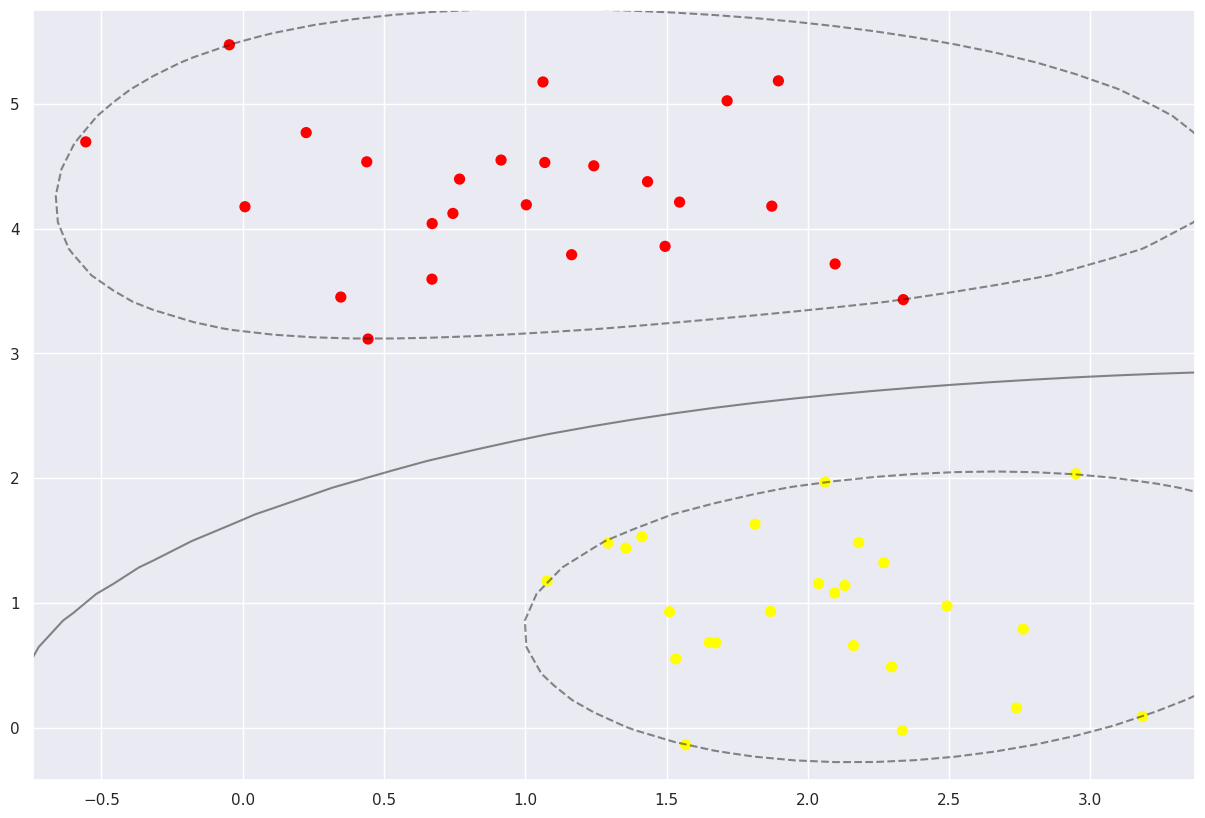

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

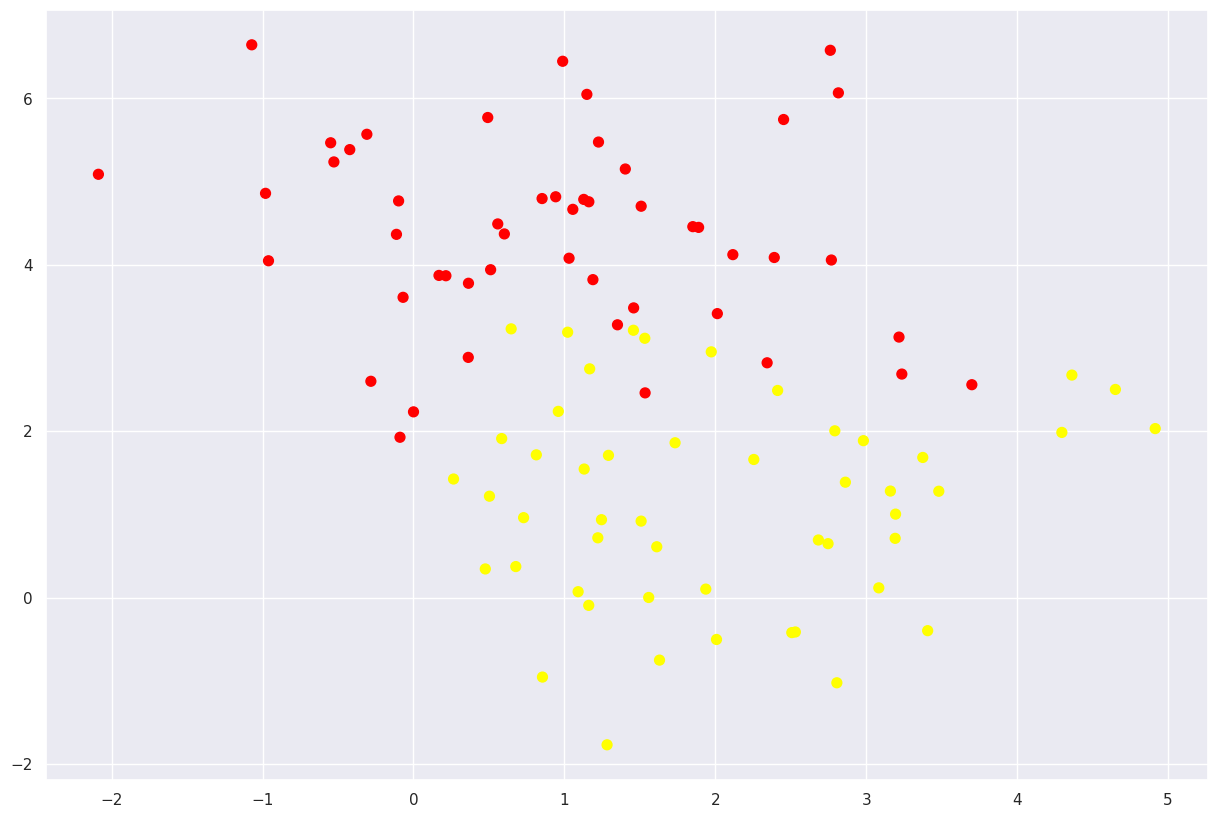

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

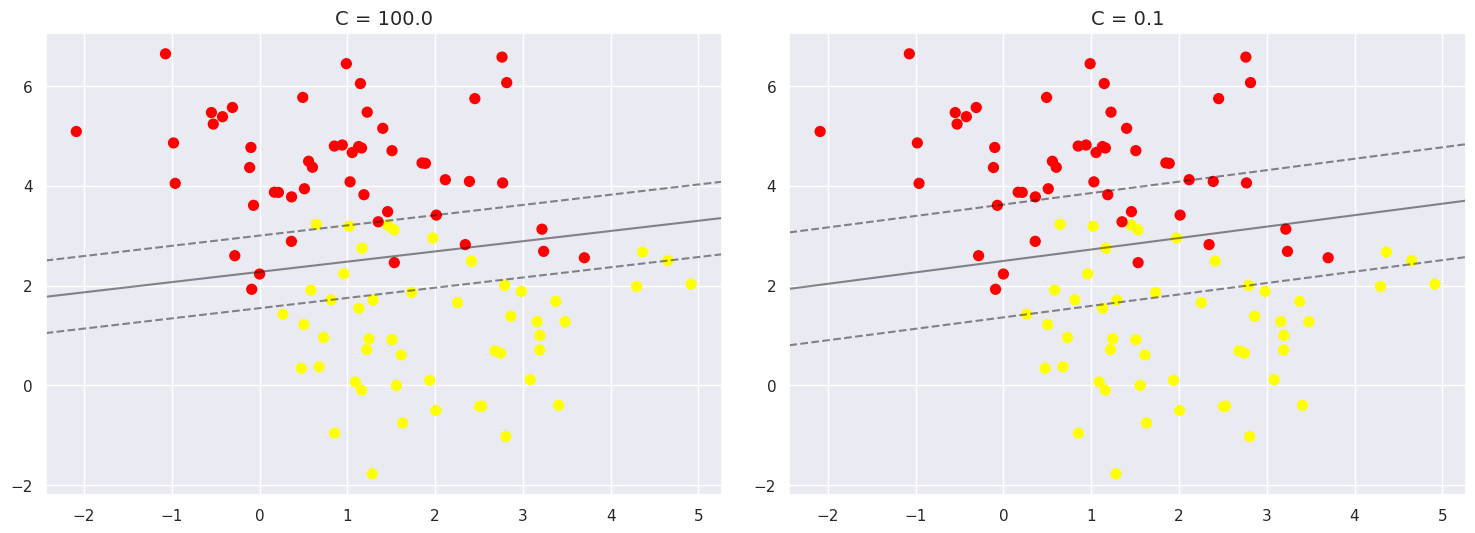

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

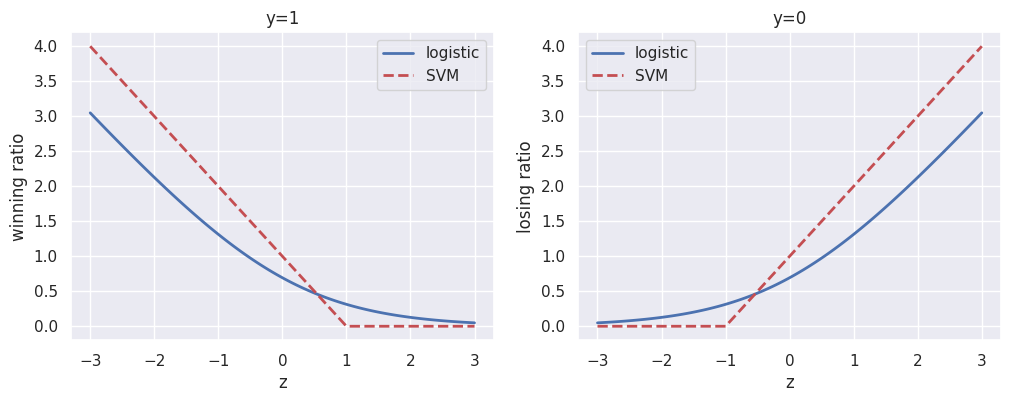

In [ ]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
z = np.linspace(-3,3,num=100)
ax[0].plot(z,-np.log(sigmoid(z)),label='logistic',lw=2, color='b')
ax[1].plot(z,-np.log(1-sigmoid(z)),label='logistic',lw=2,color='b')
ax[0].plot(z,np.maximum(0,1-z),label='SVM',lw=2, color='r',linestyle='--')
ax[1].plot(z,np.maximum(0,1+z),label='SVM',lw=2,color='r',linestyle='--')
ax[0].set_title('y=1')
ax[1].set_title('y=0')
ax[0].set_xlabel('z')
ax[1].set_xlabel('z')
ax[0].set_ylabel('winning ratio')
ax[1].set_ylabel('losing ratio')
ax[0].legend()
ax[1].legend()
plt.show()